In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Необходимо понять, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

# Часть 1: загрузка датасета про фильмы на сайте Fandango и его исследование

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
# Первые 5 строк
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
# Общая информация
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
# Описательная статистика
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Изучение связи между популярностью фильма и его рейтингом.**

Text(0.5, 1.0, 'Связь колонок Rating и Votes')

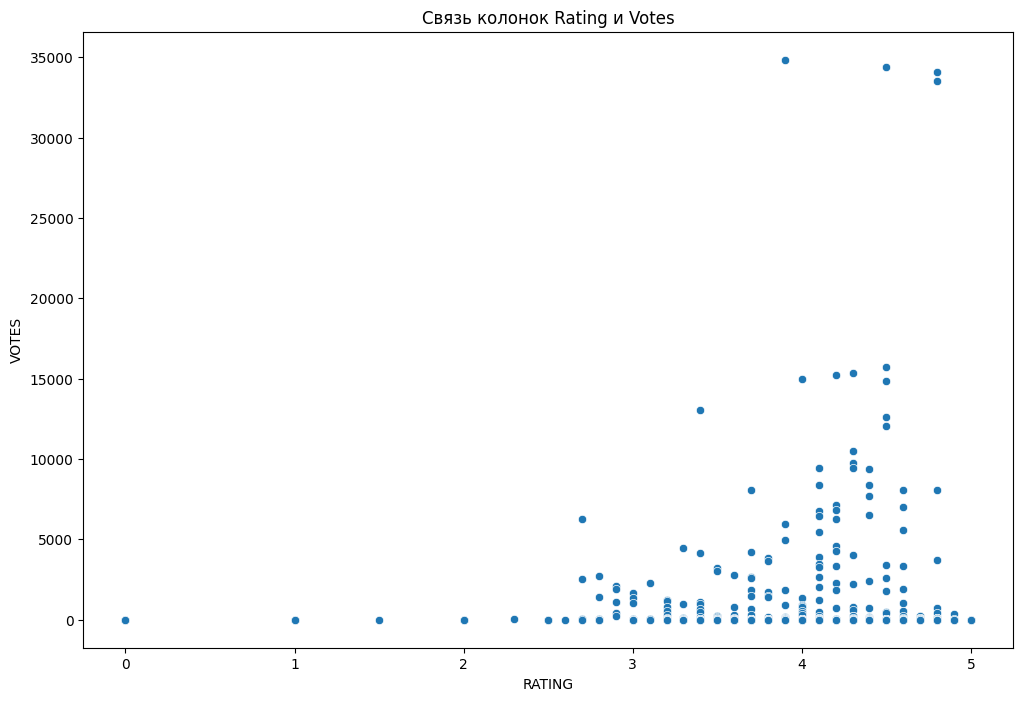

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Связь колонок Rating и Votes')

**Вычисление корреляции между колонками**

In [8]:
fandango.corr()

C:\Users\Турбо\AppData\Local\Temp\ipykernel_15712\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Добавление к датасету колонки YEAR**

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: (x.split()[-1])[1:-1])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Определение количества фильмов в год и визуализация**

In [10]:
count = fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Text(0.5, 1.0, 'Количество фильмов')

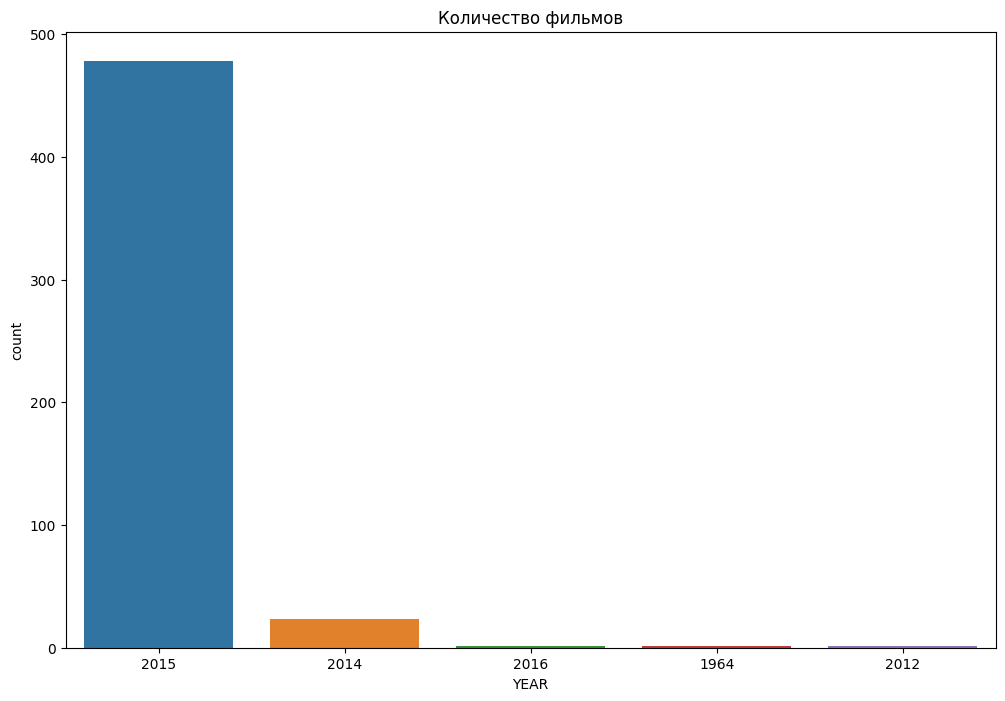

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=fandango, x='YEAR')
plt.title('Количество фильмов')

**10 Самых популярных фильмов**

In [24]:
fandango.sort_values(by='VOTES', ascending=False)
fandango.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Удаление не оценённых фильмов**

In [25]:
# Количество не оценённых фильмов
len(fandango[fandango['VOTES'] == 0])

69

In [26]:
fandango = fandango[fandango['VOTES'] != 0]
fandango.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


----
**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

Text(0.5, 1.0, 'Истинный рейтинг на сайте и рейтинг звёзд на сайте')

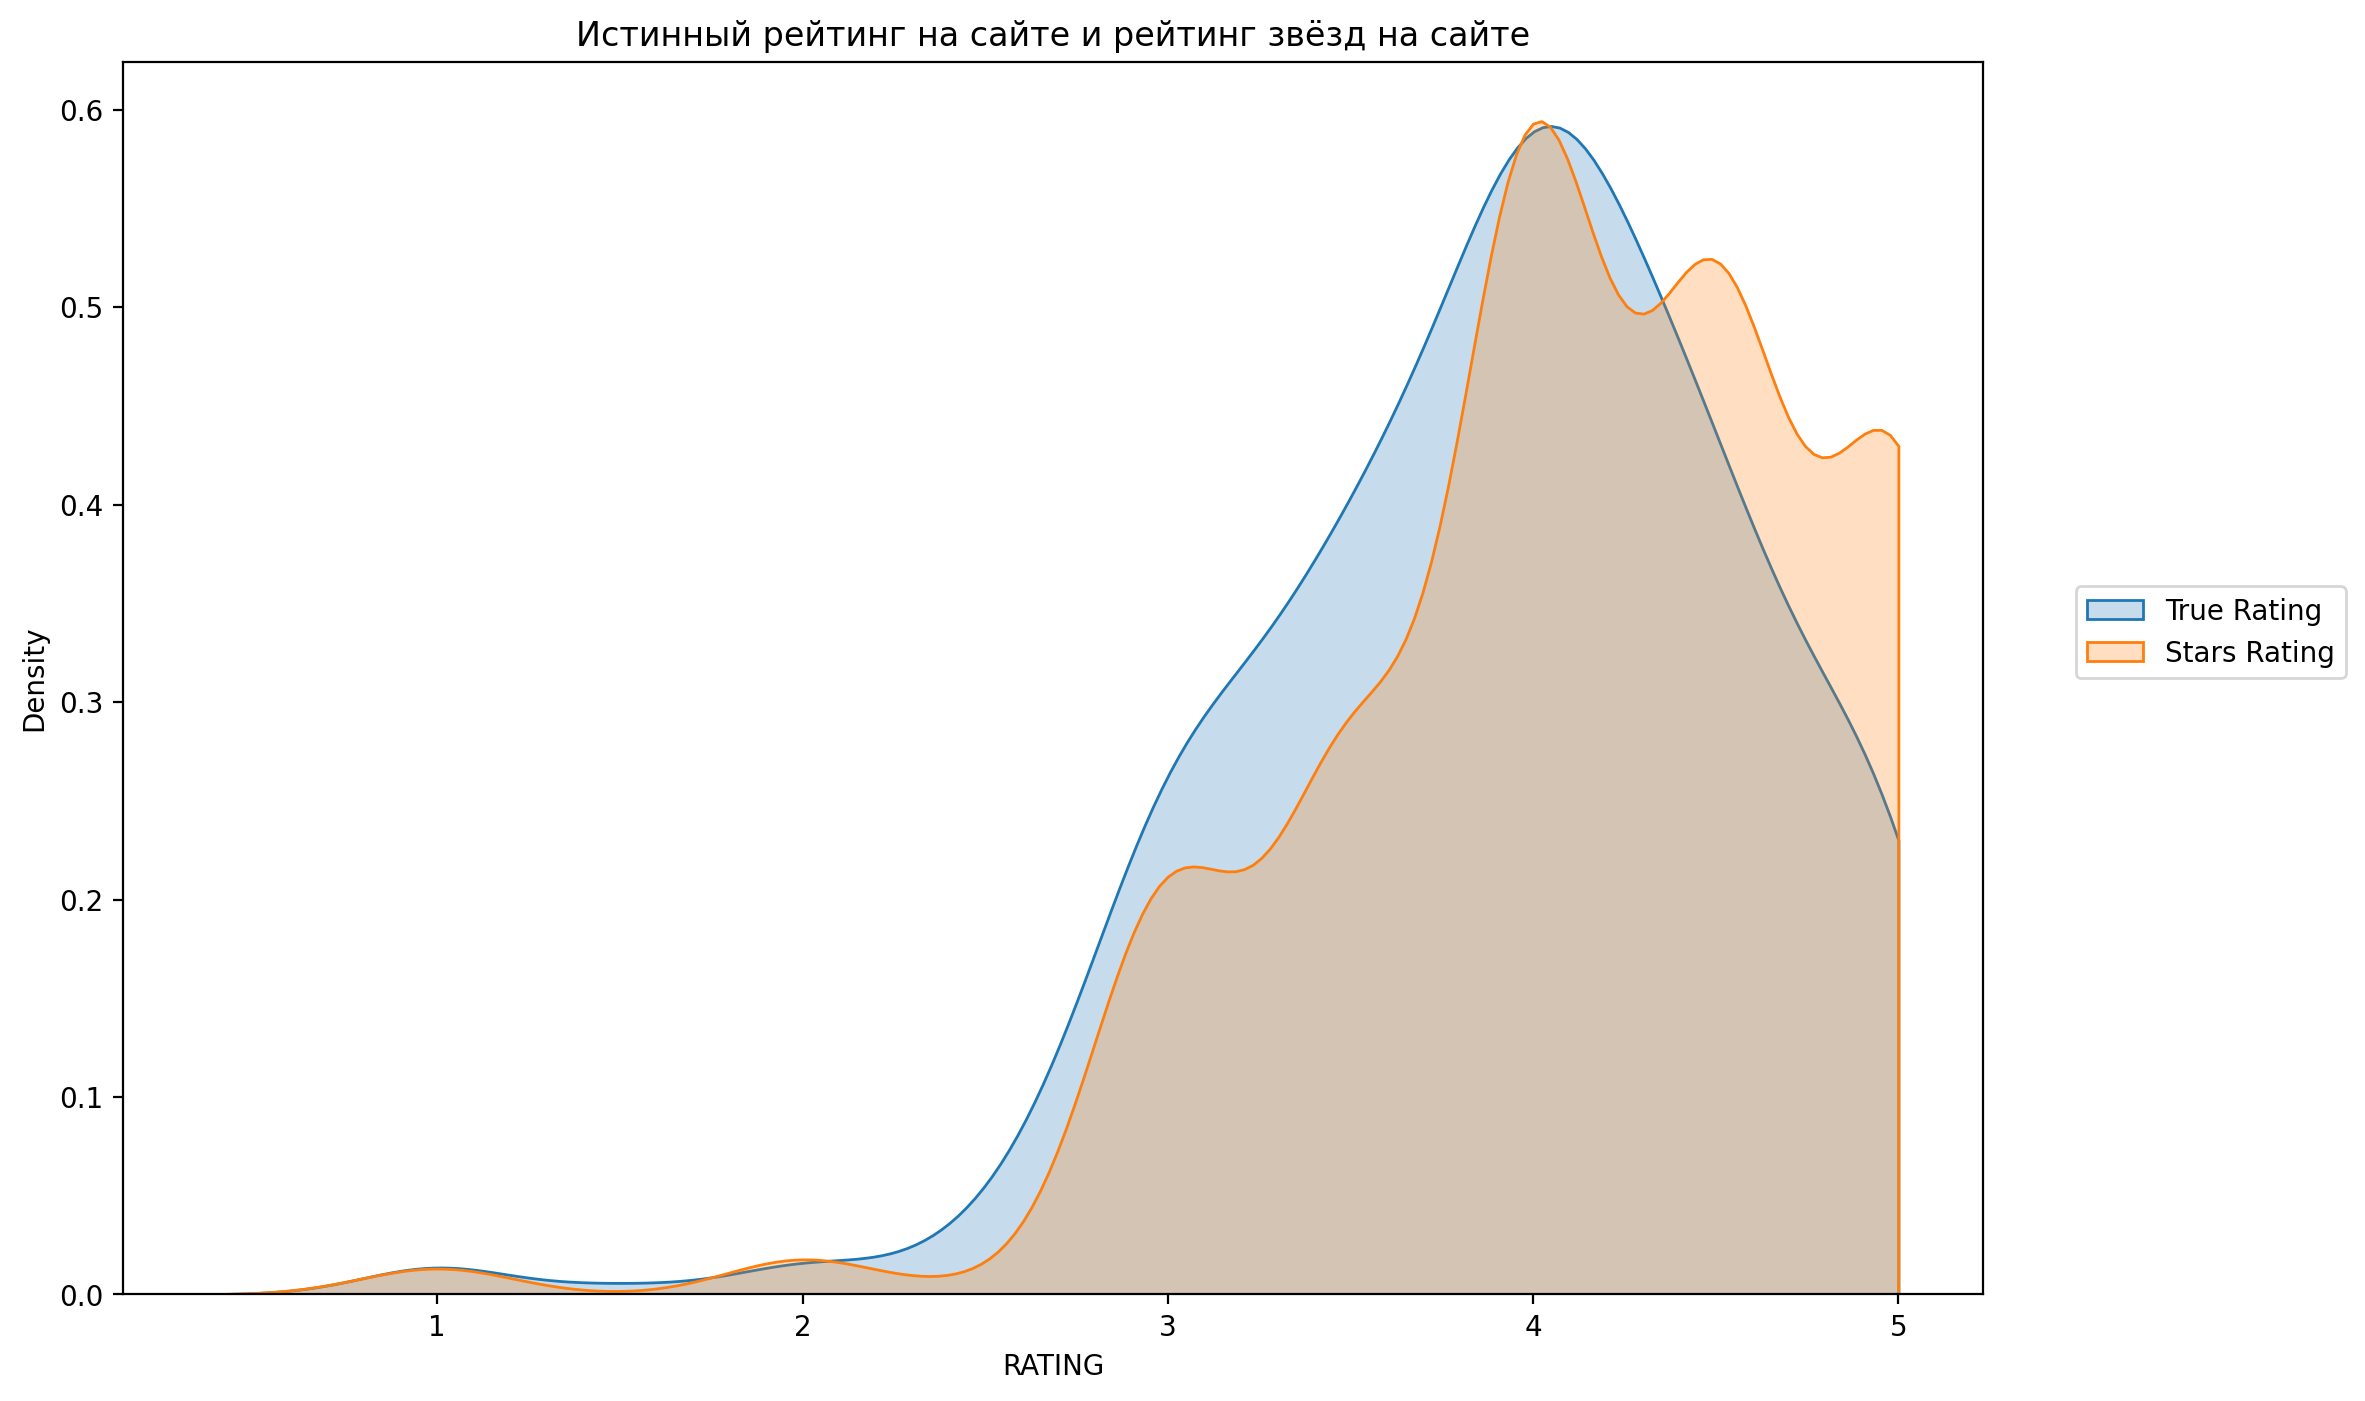

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data=fandango, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fandango, x='STARS', clip=[0,5], fill=True, label='Stars Rating')
plt.legend(loc=(1.05, 0.5))
plt.title('Истинный рейтинг на сайте и рейтинг звёзд на сайте')

**Чтобы точно оценить эту разницу в оценках, сначала добавим новый столбец с разнцией, а затем визуализируем полученное.**

In [28]:
fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 1)
fandango.head()

C:\Users\Турбо\AppData\Local\Temp\ipykernel_15712\2769445681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


Text(0.5, 1.0, 'Сколько раз встречается та или иная разница')

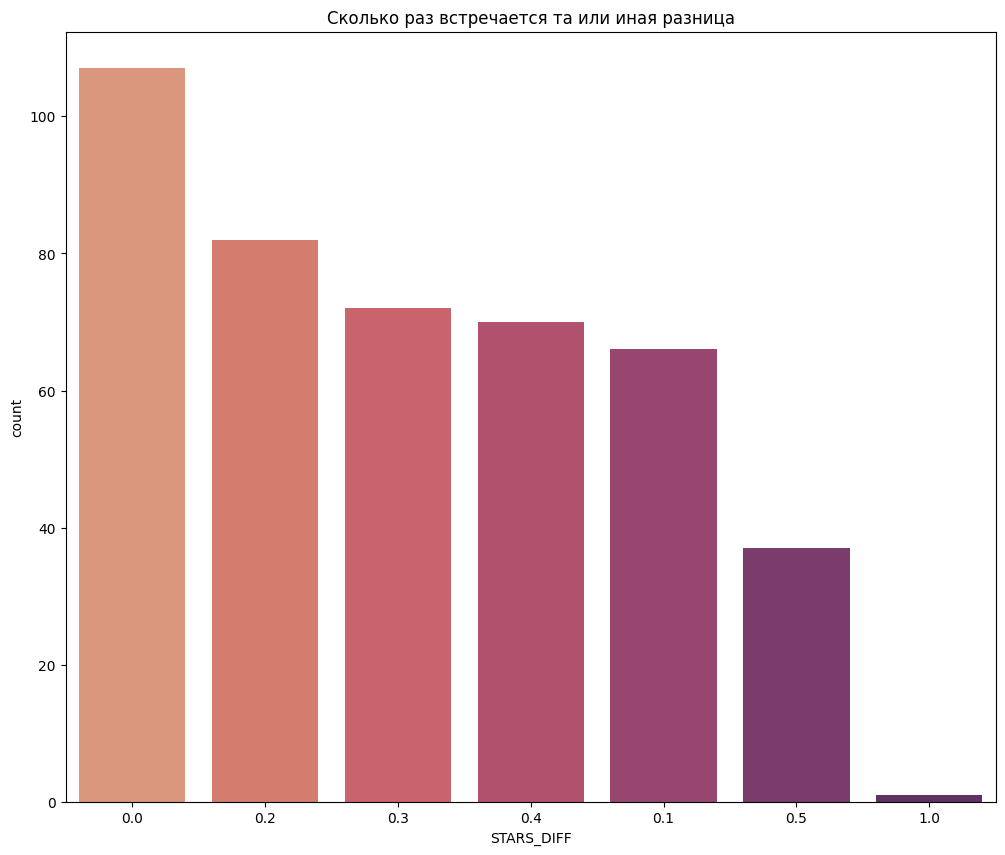

In [38]:
plt.figure(figsize=(12,10),dpi=100)
sns.countplot(data=fandango, x='STARS_DIFF', palette='flare', 
              order=fandango['STARS_DIFF'].value_counts().index)
plt.title('Сколько раз встречается та или иная разница')

In [39]:
# Где-то разница доходит даже до 1!
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


----

**Из исследований можно сделать вывод, что на сайте Fandango истинный рейтинг сильно отличается от рейтинга по шкале звёзд. Причём разница не может быть отрицательной, значит рейтинг звёзд округляется только в большую сторону. Таким образом Fandango специально пытается завысить рейтинг, чтобы получить больше прибыли.**

# Часть 2: Сравнение рейтингов Fandango с рейтингами других компаний